In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quimb import *
import quimb.tensor as qtn
from quimb.tensor import *
from scipy.linalg import expm, sinm, cosm
from scipy.stats import unitary_group


def purify_canon(rho):
    """Take state rho and purify it into a wavefunction of squared
    dimension.

    Parameters
    ----------
    rho : operator
        Density operator to purify.

    Returns
    -------
    vector :
        The purified ket.
    """
    d = rho.shape[0]
    evals, vs = eigh(rho)
    evals = np.sqrt(np.clip(evals, 0, 1))
    psi = np.zeros(shape=(d**2, 1), dtype=complex)
    for i, evals in enumerate(evals.flat):
        psi += evals * kron(vs[:, [i]], np.conjugate(vs[:, [i]]))
    return qu(psi)

def purify_WZ(rho):
    """Take state rho and purify it into a wavefunction of squared
    dimension.

    Parameters
    ----------
    rho : operator
        Density operator to purify.

    Returns
    -------
    vector :
        The purified ket.
    """
    d = rho.shape[0]
    evals, vs = eigh(rho)
    evals = (np.clip(evals, 0, 1))
    psi = np.zeros(shape=(d**2, 1), dtype=complex)
    for i, evals in enumerate(evals.flat):
        psi += evals * kron(vs[:, [i]], np.conjugate(vs[:, [i]]))
    return qu(psi)
 
def SR_spec(rho, dims, subsys):

    pur_dims = np.append(dims, dims)
    pur_subsys = np.append(subsys, len(dims)+subsys)

    psi = purify_canon(rho)
    psi = psi/np.linalg.norm(psi)
    rhoA = partial_trace(psi, pur_dims, pur_subsys)
    spec = np.linalg.eig(rhoA)
    return spec


def SR(rho, dims, subsys):
    
    
    if  entropy(rho) < .001:
        return SvN(rho, dims, subsys)*2
    else:
        pur_dims = np.append(dims, dims)
        pur_subsys = np.append(subsys, len(dims)+subsys)

        psi = purify_canon(rho)
        psi = psi/np.linalg.norm(psi)
        return SvN(psi, pur_dims, pur_subsys)

def Gibbs(H, beta):
    return expm(-beta*H)/trace(expm(-beta*H))
    
def SvN(rho, dims, subsys):
    rhoA = partial_trace(rho, dims, subsys)
    return entropy(rhoA)

def MI(rho, dims, subsys1, subsys2):
    rhoA = partial_trace(rho, dims, subsys1)
    rhoB = partial_trace(rho, dims, subsys2)
    return entropy(rhoA)+entropy(rhoB)-entropy(rho)

def eigenstate(H,nth):
    evals, vs = eigh(H)
    return np.outer(vs[:,nth],np.conjugate(vs[:,nth]))


def corrs(rho, kept,sysA,sysB):
    SR_var = (SR(rho, (np.ones(kept)*2).astype(int), sysA))
    MI_var = (MI(rho, (np.ones(kept)*2).astype(int),sysA,sysB))
    LN_var =(logneg(rho, (np.ones(kept)*2).astype(int),sysA))

    return SR_var,MI_var, LN_var

def fixB_varA_driver(num_spins,kept):
    N = 2**num_spins
    psi = rand_haar_state(N)
    rho = np.outer(psi,np.conjugate(psi))
    SRs = []
    MIs = []
    LNs = []
    if kept < num_spins:
        rho = partial_trace(rho, (np.ones(num_spins)*2).astype(int), keep=np.arange(kept))

    for i in np.arange(int(kept/2)+1):
        sysA = np.arange(i)

        sysB = np.arange(i,kept)
        SRs_var, MI_var, LN_var = corrs(rho, kept,sysA,sysB)
        SRs.append(SRs_var)
        MIs.append(MI_var)
        LNs.append(LN_var)

    
    return SRs,  MIs, LNs


def varB_driver(num_spins):
    N = 2**num_spins
    psi = rand_haar_state(N)
    rho = np.outer(psi,np.conjugate(psi))
    SRs = [0]
    MIs = [0]
    LNs = [0]
    
    
    for kept in np.arange(2,num_spins+2,2):
        
        rho = np.outer(psi,np.conjugate(psi))
        if kept  < num_spins:
            rho = partial_trace(rho, (np.ones(num_spins)*2).astype(int), keep=np.arange(kept))
        sysA = np.arange(int(kept/2))
        sysB = np.arange(int(kept/2),kept)
        SRs_var, MI_var, LN_var = corrs(rho, kept,sysA,sysB)
        SRs.append(SRs_var)
        MIs.append(MI_var)
        LNs.append(LN_var)

    return SRs, MIs, LNs
    

# def main():
num_spins = 12
kept = 8
runs = 100

N = 2**num_spins

for j in np.arange(runs):
    psi = rand_haar_state(N)
    rho = np.outer(psi,np.conjugate(psi))
    SRs = []
    MIs = []
    LNs = []
    if kept < num_spins:
        rho = partial_trace(rho, (np.ones(num_spins)*2).astype(int), keep=np.arange(kept))

    print(j)
    i= 1
    sysA = np.arange(i)
    sysB = np.arange(i,kept)
    if j == 0:
        spec1 = np.abs(SR_spec(rho,  (np.ones(kept)*2).astype(int), sysA)[0])
    else:
        spec1 = np.append(spec1,np.abs(SR_spec(rho,  (np.ones(kept)*2).astype(int), sysA)[0]))

# SRs,  MI, LN = fixB_varA_driver(num_spins,kept)
# plt.plot(LN)
# plt.plot(MI)
# plt.plot(SRs)
# plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56


In [ ]:
data1 = np.histogram(spec1,bins=np.arange(0,.4,.01))
newdata1 = []
for i in np.arange(len(data1[0])):
#     print(i)
    newdata1.append((data1[1][i]+data1[1][i+1])/2)
plt.plot(newdata1,data1[0]/max(data1[0]), label=r'$V_{A_1} = 1$')
plt.vlines(.5**2,0,1,linestyles='dashed',color='red')

data2 = np.histogram(spec2,bins=np.arange(0,.4,.01))
newdata2 = []
for i in np.arange(len(data2[0])):
#     print(i)
    newdata2.append((data2[1][i]+data2[1][i+1])/2)
plt.plot(newdata2,data2[0]/max(data2[0]), label=r'$V_{A_1} = 2$')
plt.vlines(.25**2,0,1,linestyles='dashed',color='red')

data3 = np.histogram(spec3,bins=np.arange(0,.4,.01))
newdata3 = []
for i in np.arange(len(data3[0])):
#     print(i)
    newdata3.append((data3[1][i]+data3[1][i+1])/2)
plt.plot(newdata3,data3[0]/max(data3[0]), label=r'$V_{A_1} = 3$')
plt.vlines(.125**2,0,1,linestyles='dashed',color='red')


plt.xlabel(r'$\lambda$')
plt.ylabel(r'$counts$')
plt.legend()
plt.title(r"$V_B = 4$, $V_A = 8$")


plt.savefig('rand_pure_state_12_spins_var_A1_SR_spec.png', dpi = 300)
plt.show()

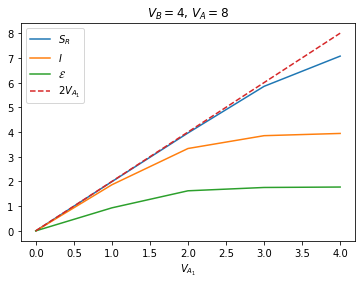

In [21]:
plt.plot( SRs, label = r"$S_R$")
plt.plot( MI, label = r"$I$")
plt.plot( LN, label = r"$\mathcal{E}$")
plt.plot([0,4],[0,8],'--', label = r"$2V_{A_1}$")
plt.xlabel(r"$V_{A_1}$")
plt.title(r"$V_B = 4$, $V_A = 8$")
plt.legend()

plt.savefig('rand_pure_state_12_spins_var_A1.png', dpi = 300)

plt.show()